# Semantic Similarity

<div class="alert alert-info">

This tutorial is available as an IPython notebook at [Malaya/example/semantic-similarity](https://github.com/huseinzol05/Malaya/tree/master/example/semantic-similarity).
    
</div>

<div class="alert alert-info">

This module trained on both standard and local (included social media) language structures, so it is save to use for both.
    
</div>

In [1]:
%%time
import malaya

CPU times: user 6.55 s, sys: 1.49 s, total: 8.05 s
Wall time: 10 s


### Models accuracy

We use `sklearn.metrics.classification_report` for accuracy reporting, check at https://malaya.readthedocs.io/en/latest/models-accuracy.html#similarity

### labels supported

Default labels for semantic similarity module.

In [2]:
malaya.similarity.label

['not similar', 'similar']

In [2]:
string1 = 'Pemuda mogok lapar desak kerajaan prihatin isu iklim'
string2 = 'Perbincangan isu pembalakan perlu babit kerajaan negeri'
string3 = 'kerajaan perlu kisah isu iklim, pemuda mogok lapar'
string4 = 'Kerajaan dicadang tubuh jawatankuasa khas tangani isu alam sekitar'

In [3]:
news1 = 'Tun Dr Mahathir Mohamad mengakui pembubaran Parlimen bagi membolehkan pilihan raya diadakan tidak sesuai dilaksanakan pada masa ini berikutan isu COVID-19'
tweet1 = 'DrM sembang pilihan raya tak boleh buat sebab COVID 19'

### List available Transformer models

In [4]:
malaya.similarity.available_transformer()

INFO:root:tested on 20% test set.


,Size (MB),Quantized Size (MB),macro precision,macro recall,macro f1-score
bert,423.4,111.0,0.88315,0.88656,0.88405
tiny-bert,56.6,15.0,0.87210,0.87546,0.87292
albert,48.3,12.8,0.87164,0.87146,0.87155
tiny-albert,21.9,6.0,0.82234,0.82383,0.82295
xlnet,448.7,119.0,0.80866,0.76775,0.77112
alxlnet,49.0,13.9,0.88756,0.88700,0.88727


We trained on [Quora Question Pairs](https://github.com/huseinzol05/Malay-Dataset#quora), [translated SNLI](https://github.com/huseinzol05/Malay-Dataset#snli) and [translated MNLI](https://github.com/huseinzol05/Malay-Dataset#mnli)

### Load transformer model

```python
def transformer(model: str = 'bert', quantized: bool = False, **kwargs):
    """
    Load Transformer similarity model.

    Parameters
    ----------
    model : str, optional (default='bert')
        Model architecture supported. Allowed values:

        * ``'bert'`` - Google BERT BASE parameters.
        * ``'tiny-bert'`` - Google BERT TINY parameters.
        * ``'albert'`` - Google ALBERT BASE parameters.
        * ``'tiny-albert'`` - Google ALBERT TINY parameters.
        * ``'xlnet'`` - Google XLNET BASE parameters.
        * ``'alxlnet'`` - Malaya ALXLNET BASE parameters.
    
    quantized : bool, optional (default=False)
        if True, will load 8-bit quantized model. 
        Quantized model not necessary faster, totally depends on the machine.

    Returns
    -------
    result: model
        List of model classes:
        
        * if `bert` in model, will return `malaya.model.bert.SiameseBERT`.
        * if `xlnet` in model, will return `malaya.model.xlnet.SiameseXLNET`.
    """
```

In [5]:
model = malaya.similarity.transformer(model = 'alxlnet')

### Load Quantized model

To load 8-bit quantized model, simply pass `quantized = True`, default is `False`.

We can expect slightly accuracy drop from quantized model, and not necessary faster than normal 32-bit float model, totally depends on machine.

In [6]:
quantized_model = malaya.similarity.transformer(model = 'alxlnet', quantized = True)

#### predict batch of strings with probability

```python
def predict_proba(self, strings_left: List[str], strings_right: List[str]):
    """
    calculate similarity for two different batch of texts.

    Parameters
    ----------
    string_left : List[str]
    string_right : List[str]

    Returns
    -------
    result : List[float]
    """
```

you need to give list of left strings, and list of right strings.

first left string will compare will first right string and so on.

similarity model only supported `predict_proba`.

In [7]:
model.predict_proba([string1, string2, news1, news1], [string3, string4, tweet1, string1])

array([0.99828064, 0.01076903, 0.9603669 , 0.9075881 ], dtype=float32)

In [8]:
quantized_model.predict_proba([string1, string2, news1, news1], [string3, string4, tweet1, string1])

array([0.9987801 , 0.00554545, 0.8729592 , 0.49839294], dtype=float32)

#### visualize heatmap

```python
def heatmap(
    self,
    strings: List[str],
    visualize: bool = True,
    annotate: bool = True,
    figsize: Tuple[int, int] = (7, 7),
):
    """
    plot a heatmap based on output from similarity

    Parameters
    ----------
    strings : list of str
        list of strings.
    visualize : bool
        if True, it will render plt.show, else return data.
    figsize : tuple, (default=(7, 7))
        figure size for plot.

    Returns
    -------
    result: list
        list of results
    """
```

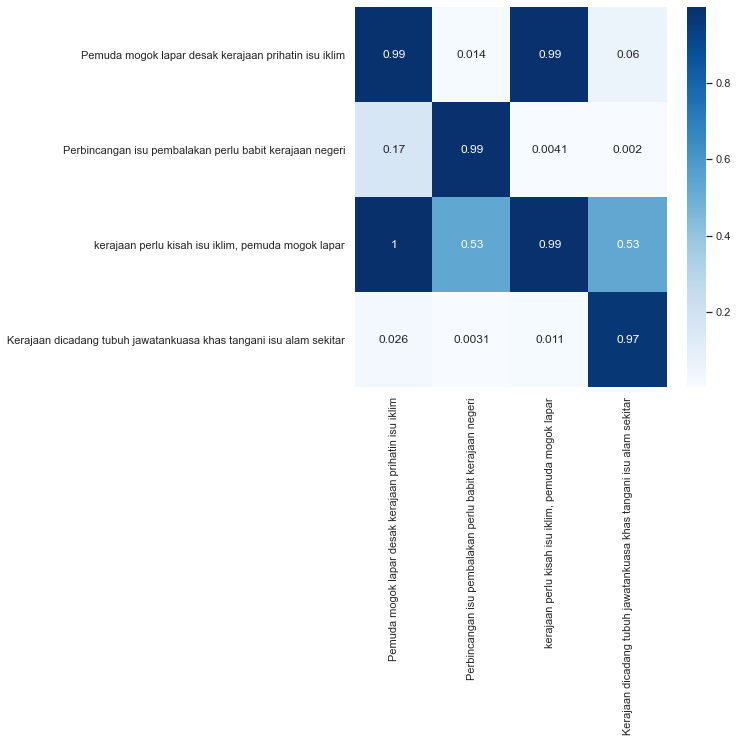

In [9]:
model.heatmap([string1, string2, string3, string4])

### Vectorize

Let say you want to visualize sentences in lower dimension, you can use `model.vectorize`,

```python
def vectorize(self, strings: List[str]):
    """
    Vectorize list of strings.

    Parameters
    ----------
    strings : List[str]

    Returns
    -------
    result: np.array
    """
```

In [10]:
texts = [string1, string2, string3, string4, news1, tweet1]
r = quantized_model.vectorize(texts)

In [11]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE().fit_transform(r)
tsne.shape

(6, 2)

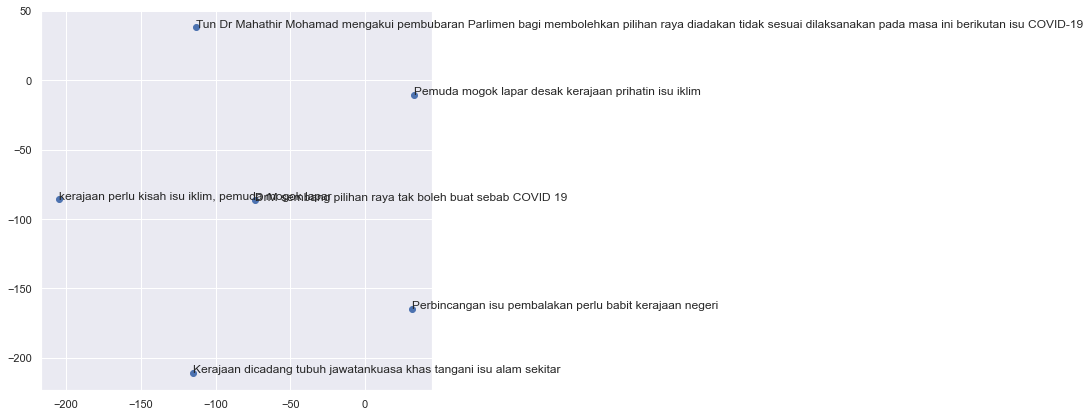

In [12]:
plt.figure(figsize = (7, 7))
plt.scatter(tsne[:, 0], tsne[:, 1])
labels = texts
for label, x, y in zip(
    labels, tsne[:, 0], tsne[:, 1]
):
    label = (
        '%s, %.3f' % (label[0], label[1])
        if isinstance(label, list)
        else label
    )
    plt.annotate(
        label,
        xy = (x, y),
        xytext = (0, 0),
        textcoords = 'offset points',
    )

### Stacking models

More information, you can read at https://malaya.readthedocs.io/en/latest/Stack.html

If you want to stack semantic similarity models, you need to pass labels using `strings_right` parameter,

```python
malaya.stack.predict_stack([model1, model2], List[str], strings_right = List[str])
```

We will passed `strings_right` as `**kwargs`.

In [13]:
alxlnet = malaya.similarity.transformer(model = 'alxlnet')
albert = malaya.similarity.transformer(model = 'albert')
tiny_bert = malaya.similarity.transformer(model = 'tiny-bert')

In [14]:
malaya.stack.predict_stack([alxlnet, albert, tiny_bert], [string1, string2, news1, news1], 
                           strings_right = [string3, string4, tweet1, string1])

array([0.9968965 , 0.17514098, 0.11507297, 0.01998391], dtype=float32)